In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
def ME(trace, constraint, epsilon=1e-6, eta=1, max_iter=1000):
        
    def objective(lambda_):
        
        lambda_ = lambda_.reshape(1, -1)
        
        objective_trace = np.exp(np.dot(lambda_, constraint.T)).T # exp(<l, h(theta)>)
        gradient_trace = constraint * objective_trace # h(theta) * exp(<l, h(theta)>)

        objective = np.mean(objective_trace) # posterior expectation of exp(<l, h(theta)>)

        gradient = np.mean(gradient_trace, axis=0) / objective # posterior expectation of gradient of exp(<l, h(theta)>) 
        
        return gradient, np.log(objective)

    
    def print_state(i, lam, grad, objective_):
        print(
            f'iter {i} ' +
            f'|lambda| = {round(np.linalg.norm(lam), 6)} ' +
            f'|grad| = {round(np.linalg.norm(grad), 9)} '
        )

    lambda_ = np.zeros(constraint.shape[1])

    gradient, log_objective = objective(lambda_)
    previous_gradient = gradient

    i = 0

    print_state(i, lambda_, gradient, log_objective)

    while np.linalg.norm(gradient) > epsilon:

        lambda_ = lambda_ - eta * gradient
        gradient, log_objective = objective(lambda_)

        i += 1

        if np.linalg.norm(gradient) / np.linalg.norm(previous_gradient) < .1:
            previous_gradient = gradient
            print_state(i, lambda_, gradient, log_objective)

        if i >= max_iter:
            print(f'Max iterations ({max_iter}) exceeded')
            break

    print_state(i, lambda_, gradient, log_objective)

    weights = np.exp(np.dot(lambda_, constraint.T)).T / np.sum(np.exp(np.dot(lambda_, constraint.T)).T)
    
    return lambda_, weights, gradient
    
    

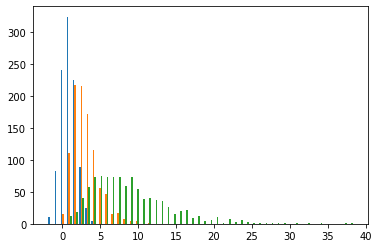

In [46]:
trace = np.array([np.random.normal(1, 1, 1000), np.random.gamma(3, 1, 1000), np.random.gamma(3, 3, 1000)]).T

plt.hist(trace, bins=50)
plt.show()

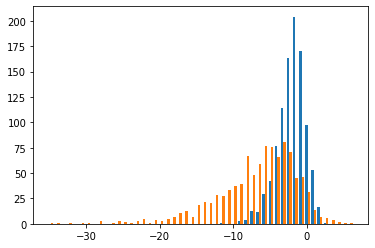

In [47]:
constraint = np.array([trace[:,0] - trace[:, 1], trace[:,1] - trace[:, 2] - 1]).T

plt.hist(constraint, bins=50)
plt.show()

In [48]:
lambda_, weights, gradient = ME(trace, constraint, eta=.1)

iter 0 |lambda| = 0.0 |grad| = 7.192652833 
iter 10 |lambda| = 1.750813 |grad| = 0.662511195 
iter 73 |lambda| = 3.040531 |grad| = 0.065381821 
iter 195 |lambda| = 3.339543 |grad| = 0.006472598 
iter 330 |lambda| = 3.373709 |grad| = 0.000643689 
iter 467 |lambda| = 3.377162 |grad| = 6.3446e-05 
iter 604 |lambda| = 3.377503 |grad| = 6.269e-06 
iter 713 |lambda| = 3.377534 |grad| = 9.94e-07 


In [49]:
lambda_

array([2.67263857, 2.06512444])

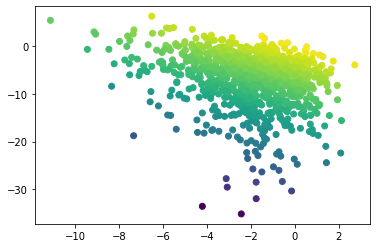

In [50]:
plt.scatter(constraint[:,0], constraint[:,1], c=np.log(weights))
plt.show()

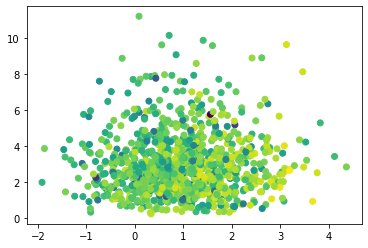

In [51]:
plt.scatter(trace[:,0], trace[:,1], c=np.log(weights))
plt.show()

In [52]:
np.sum(trace[:,0] * weights), np.sum(trace[:,1] * weights),  np.sum(trace[:,2] * weights)

(2.6004963457243733, 2.600497164472712, 1.6004977287936217)

In [53]:
np.mean(trace[:,0]), np.mean(trace[:,1]), np.mean(trace[:,2])

(0.9538170284885763, 2.995504408564864, 8.892298404517428)